## Import required libraries

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


### Load dataset

In [4]:
mxmh = pd.read_csv("mxmh_survey_results.csv")
mxmh

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


## Exploration
#### Let's start the exploration by taking a look at the info given by pandas, we can see that there are some columns with null values, so I will look at that

In [5]:
mxmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

#### Let's check if there are any duplicated rows

In [54]:
mxmh.duplicated().sum()

0

## Null values

In [55]:
mxmh.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

### I notice two things: 
1. There are columns with very few null values, which allows their deletion since it does not significantly affect the data set.
2. In particular, there is a column that has a large number of null values, 'BPM', which does not allow its deletion, since it will strongly affect the dataset, we will see this graphically as follows

C:\Users\Usuario\AppData\Local\Temp\ipykernel_49324\3751239389.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


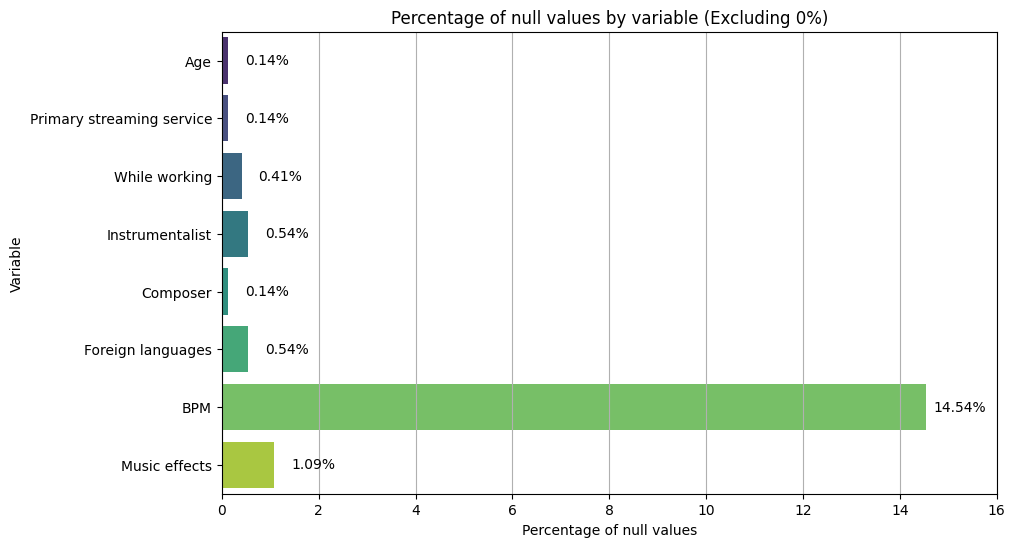

In [6]:
# Calculate the percentage of null values per column
missing_percentage = (mxmh.isnull().mean() * 100).reset_index()
missing_percentage.columns = ['Variable', 'Percentage of null values']

# Filter to include only null values whose percentage is not 0
missing_percentage_filtered = missing_percentage[missing_percentage['Percentage of null values'] > 0]

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Percentage of null values',
    y='Variable',
    data=missing_percentage_filtered,
    palette='viridis'
)

# Add the exact percentages to the right of the bars
for index, row in missing_percentage_filtered.iterrows():
    plt.text(
        row['Percentage of null values'] + 1.25, 
        row['Variable'], 
        f"{row['Percentage of null values']:.2f}%",
        va='center',
        ha='right'
    )
    
# Set the maximum limit of the X axis to 16 for better visualization
plt.xlim(left=0, right=16)  

# Add title, labels and grid
plt.title('Percentage of null values by variable (Excluding 0%)')
plt.xlabel('Percentage of null values')
plt.ylabel('Variable')
plt.grid(axis='x')
plt.show()

#### We can see that the null values in 'BPM' represent 14.54% of the records in the dataset, while the amount of null values contained in the other variables is negligible, so they can be eliminated. 

In [57]:
mxmh_clean = mxmh.dropna(subset = ["Age", "Primary streaming service", "While working", "Instrumentalist", 
                                    "Composer", "Foreign languages", "Music effects"], how = "any")

mxmh_clean.isna().sum()

Timestamp                         0
Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             102
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

### Outliers before imputation

#### Before imputing the data, I would like to check for the presence of outliers. Then we will apply statistical median imputation.

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


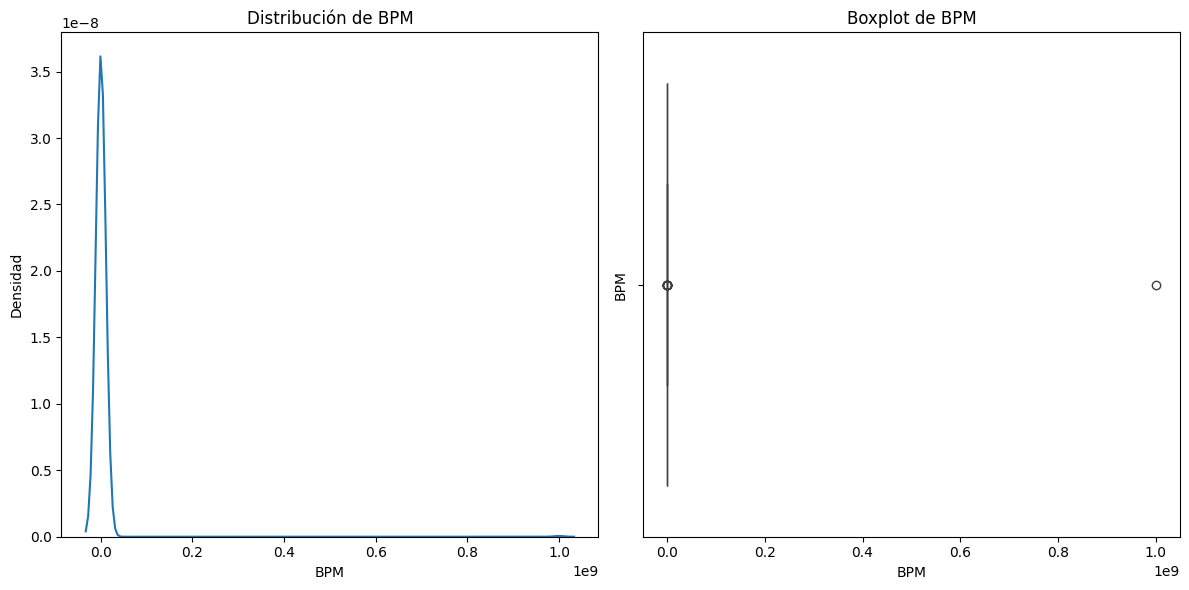

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variable I want to analyze
variable_a_analizar = "BPM"

# Create an object figure with 2 axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generate the KDE of the first axis
sns.kdeplot(mxmh['BPM'], ax=ax1)

# Customize the first axis display (KDE)
ax1.set_title("Distribución de " + variable_a_analizar)
ax1.set_xlabel(variable_a_analizar)
ax1.set_ylabel("Densidad")

# Generate the boxplot on the second axis
sns.boxplot(x=mxmh['BPM'], ax=ax2, orient='v')

# Customize the display of the second axis (boxplot)
ax2.set_title("Boxplot de " + variable_a_analizar)
ax2.set_ylabel(variable_a_analizar)

# Adjusts the distribution of the subplots
plt.tight_layout()

# Display the graphic
plt.show()

In [59]:
mxmh_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,718.0,2.517688e+01,1.195392e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,718.0,3.578064e+00,3.017779e+00,0.0,2.0,3.0,5.0,24.0
BPM,616.0,1.623500e+06,4.029114e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,718.0,5.837744e+00,2.784533e+00,0.0,4.0,6.0,8.0,10.0
Depression,718.0,4.806407e+00,3.020061e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,718.0,3.717967e+00,3.084387e+00,0.0,1.0,3.0,6.0,10.0
OCD,718.0,2.635097e+00,2.844382e+00,0.0,0.0,2.0,4.0,10.0


#### We notice that there are not only outliers in BPM (the column to fill in), but also in Hours per Day, so let's treat them together.

#### Interquartile Range technique to detect outliers and filter them out of the resulting dataset

In [60]:
q3_bpm = mxmh_clean[['BPM']].quantile(0.75)
q1_bpm = mxmh_clean[['BPM']].quantile(0.25)

q3_hpd = mxmh_clean[['Hours per day']].quantile(0.75)
q1_hpd = mxmh_clean[['Hours per day']].quantile(0.25)

# Tolerance value
t_bpm = q3_bpm-q1_bpm
t_hpd = q3_hpd-q1_hpd

# Upper fences
outliers_above_bpm = q3_bpm+3*t_bpm
outliers_above_hpd = q3_hpd+3*t_hpd

# Lower Fences
outliers_below_bpm = q1_bpm-3*t_bpm
outliers_below_hpd = q1_hpd-3*t_hpd

In [61]:
# Print where outlier values begin

print(outliers_above_bpm)
print(outliers_above_hpd)

BPM    276.0
dtype: float64
Hours per day    14.0
dtype: float64


In [62]:
mxmh_clean = mxmh_clean.loc[~(mxmh_clean['BPM']>276.0)]
mxmh_clean = mxmh_clean.loc[~(mxmh_clean['Hours per day']>14.0)]

In [63]:
mxmh_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,708.0,25.125706,11.712118,10.0,18.0,21.0,28.000,80.0
Hours per day,708.0,3.392726,2.480316,0.0,2.0,3.0,4.125,14.0
BPM,607.0,122.891269,34.142751,0.0,100.0,120.0,144.000,220.0
Anxiety,708.0,5.849576,2.782607,0.0,4.0,6.0,8.000,10.0
Depression,708.0,4.802260,3.006785,0.0,2.0,5.0,7.000,10.0
Insomnia,708.0,3.699859,3.071167,0.0,1.0,3.0,6.000,10.0
OCD,708.0,2.620056,2.836241,0.0,0.0,2.0,4.000,10.0


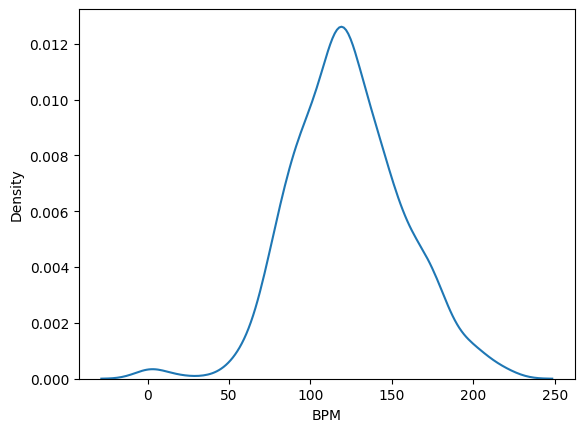

In [64]:
sns.kdeplot(x = mxmh_clean['BPM']);

### Imputation 

#### Now that our values are more normal, we will proceed to impute by median, since there are still some values that, although natural, are skewed toward the extremes.

In [67]:
mxmh_clean['BPM'] = mxmh_clean['BPM'].fillna(mxmh['BPM'].median())

In [68]:
mxmh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     708 non-null    object 
 1   Age                           708 non-null    float64
 2   Primary streaming service     708 non-null    object 
 3   Hours per day                 708 non-null    float64
 4   While working                 708 non-null    object 
 5   Instrumentalist               708 non-null    object 
 6   Composer                      708 non-null    object 
 7   Fav genre                     708 non-null    object 
 8   Exploratory                   708 non-null    object 
 9   Foreign languages             708 non-null    object 
 10  BPM                           708 non-null    float64
 11  Frequency [Classical]         708 non-null    object 
 12  Frequency [Country]           708 non-null    object 
 13  Frequency 

#### Now we don't have any null values once we deleted the few ones and imputed by mean

### Final steps and export

In [71]:
mxmh_clean.head(1)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.


#### Timestamp and permission is not useful for our analysis so we can delete those columns

In [72]:
mxmh_clean.drop(['Timestamp', 'Permissions'], axis=1, inplace = True)
mxmh_clean.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


#### Export to CSV/Excel to continue our analysis using Tableau

In [91]:
mxmh_clean.to_csv('mxmh_processed_csv.csv', index=False, decimal=',')
mxmh_clean.to_excel('mxmh_processed_excel.xlsx', index=False, sheet_name = 'Music & Mental Health')